Binary Classification


Dataset Information


Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


*Variable	Description*

    Loan_ID	Unique Loan ID
    Gender	Male/ Female
    Married	Applicant married (Y/N)
    Dependents	Number of dependents
    Education	Applicant Education (Graduate/ Under Graduate)
    Self_Employed	Self employed (Y/N)
    ApplicantIncome	Applicant income
    CoapplicantIncome	Coapplicant income
    LoanAmount	Loan amount in thousands
    Loan_Amount_Term	Term of loan in months
    Credit_History	credit history meets guidelines
    Property_Area	Urban/ Semi Urban/ Rural
    Loan_Status	Loan approved (Y/N)


In [1]:
#Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
dt=pd.read_csv("Loan Prediction Dataset.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


DATA PREPROCESSING

In [4]:
#checking for columns with missing values
dt.columns[dt.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [5]:
#Percentage of missing values in these columns
miss = dt.isnull().sum()/len(dt)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Married             0.004886
Gender              0.021173
Loan_Amount_Term    0.022801
Dependents          0.024430
LoanAmount          0.035831
Self_Employed       0.052117
Credit_History      0.081433
dtype: float64

In [6]:
#Function to fill the missing variables in the numerical data with mean.
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())
dt['CoapplicantIncome'] = dt['CoapplicantIncome'].fillna(dt['CoapplicantIncome'].mean())

In [7]:
#Rechecking for any NA afterwards
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Filling the categorical missing values with the mode
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [9]:
#Rechecking to check if all the na are filled
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [11]:
#For this we used the pandas_profiling library
profile=ProfileReport(dt)
profile

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,614
Total Missing (%),0.0%
Total size in memory,62.5 KiB
Average record size in memory,104.2 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


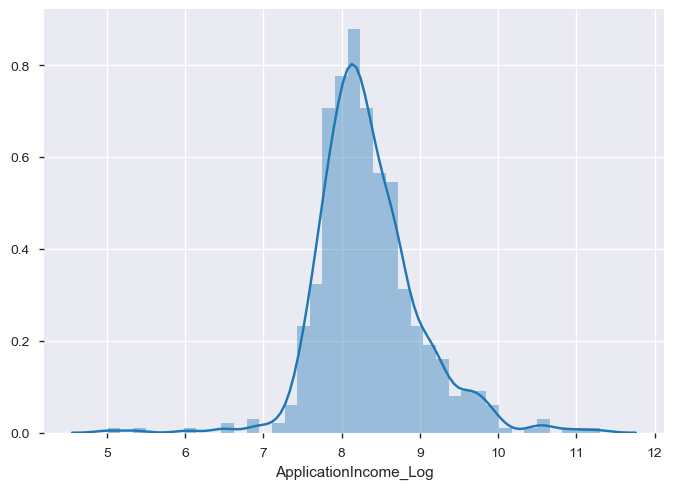

In [13]:
#From the above visuals, the numerical data sets seem to be skewed hence need for log tranformation
dt["ApplicationIncome_Log"] = np.log(dt["ApplicantIncome"])
sns.distplot(dt["ApplicationIncome_Log"])

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


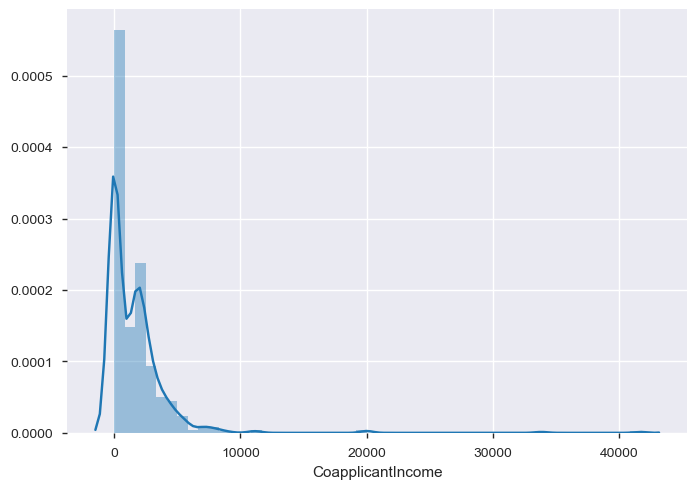

In [14]:
dt["CoapplicantIncome_Log"] = np.log(dt["CoapplicantIncome"])
sns.distplot(dt["CoapplicantIncome"])

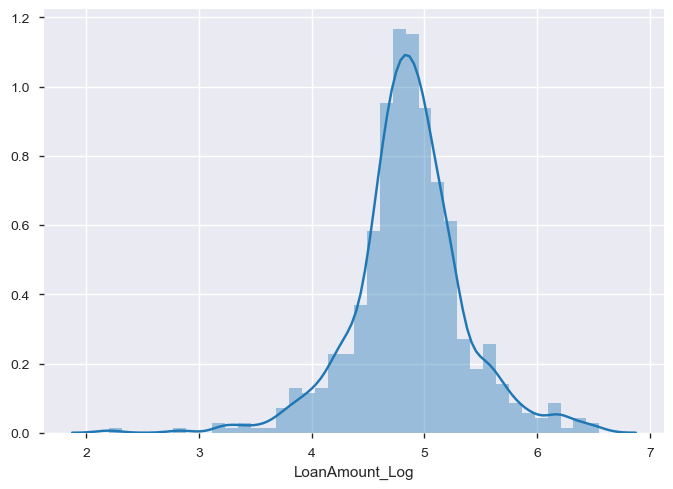

In [15]:
dt['LoanAmount_Log'] = np.log(dt['LoanAmount'])
sns.distplot(dt["LoanAmount_Log"])

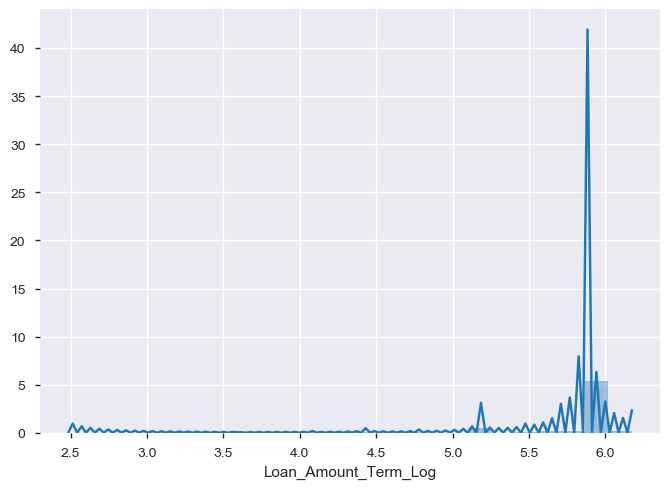

In [16]:
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
sns.distplot(dt["Loan_Amount_Term_Log"])

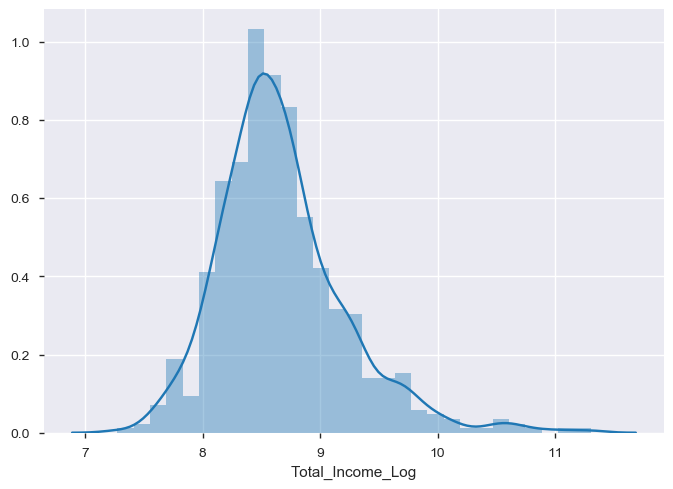

In [17]:
#Created a new variable total_income
dt["Total_Income"]=dt["ApplicantIncome"]+dt["CoapplicantIncome"]
dt['Total_Income_Log'] = np.log(dt['Total_Income'])
sns.distplot(dt["Total_Income_Log"])

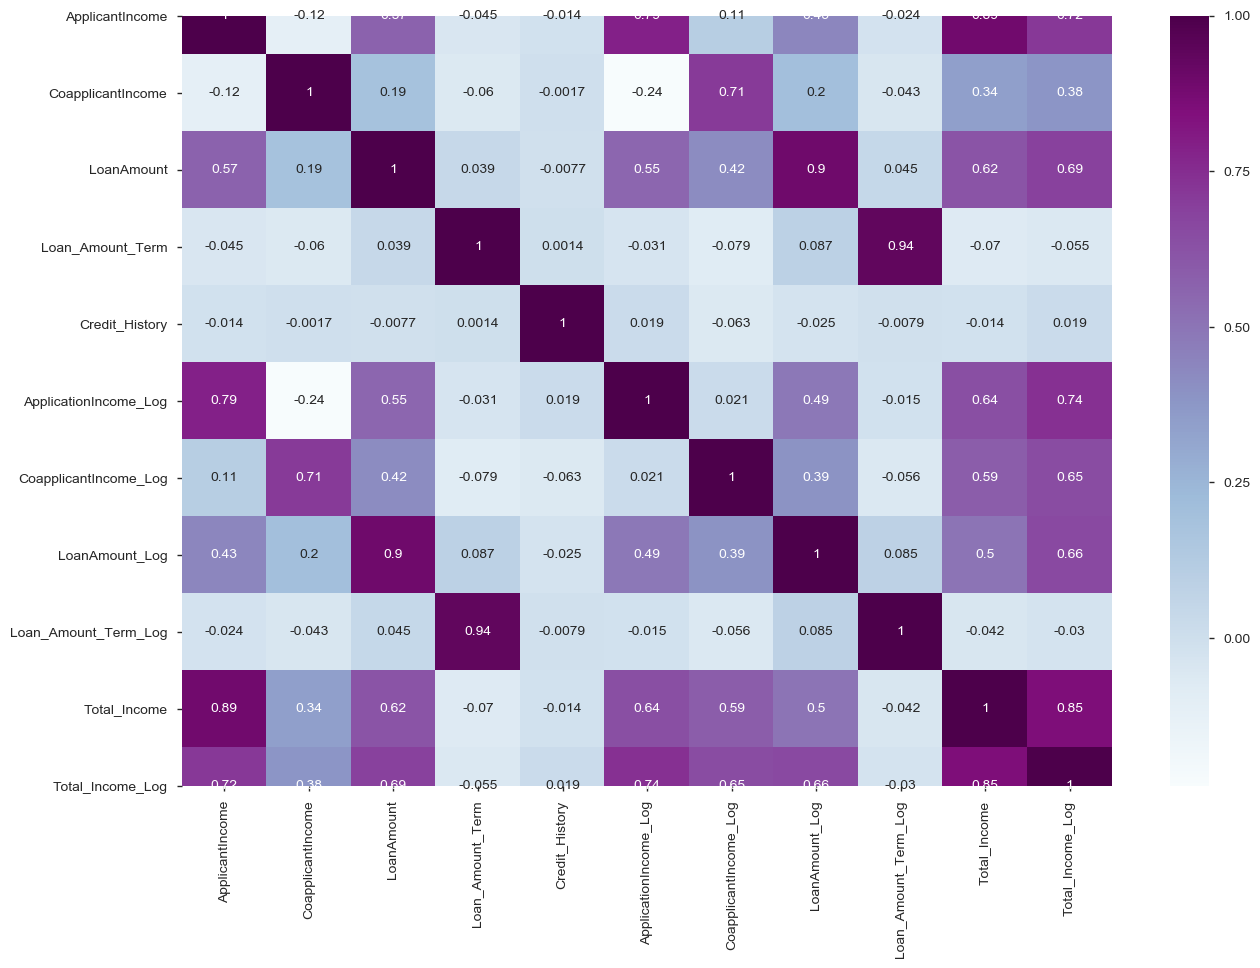

In [18]:
#plotting a correlation heatmap for the numerical variables
corr=dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [19]:
#Next will get rid of the highly correlated variables.
#From the correlation heatmap above we can clearly see that some of the variables are highly correlated hence we have to get
#rid of them to avoid multicollinearlity in the model. I will also get rid of the coapplication_log variable since it contains
#-inf values which will affect the model training process
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID',"CoapplicantIncome_Log"]
dt = dt.drop(columns=cols, axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicationIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


ENCODING

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents",]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

In [21]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicationIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


SPLITTING THE DATA INTO TRAIN AND TEST

In [22]:
# specifying the input and output attributes
X = dt.drop(columns=['Loan_Status'], axis=1)#We drop the Loan_status since its our target varible.
y = dt['Loan_Status']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

MODEL TRAINING

In [24]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.79587519830778


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [26]:
#We can also try modelling using more complex algorithms to see if the score would improve
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 70.86991010047595


In [27]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is 75.32467532467533
Cross validation is 75.26705446853516


In [28]:
#Training using the ExtraTree 
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 75.24590163934425


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


HYPER PARAMATER TUNING

In [29]:
#We can guess the parameters or use GridsearchCV or RandomsearchCV
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)



Accuracy is 75.97402597402598
Cross validation is 80.46800634584876
